## TASK 2 

Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle.
Explore the relationships between variables and identify patterns and trends in the data.
https://www.kaggle.com/c/titanic/data

-----------

#### Importing necessary libraries:

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [75]:
df=pd.read_csv(r"C:\Users\Nidhi\OneDrive\Desktop\prodigy infotech\task 2\train.csv")

In [76]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Checking number of rows and columns:

In [77]:
print("rows,columns:",df.shape)

rows,columns: (891, 12)


In [78]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Checking Missing Values:

In [80]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Since the variables "age","embarked" are important.Therefore, we will retain it and handle the missing values by Imputing them.

In [134]:
df['Age'].fillna(df['Age'].median(), inplace= True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

#### since variable "Cabin" is not required for the analysis we will drop the column.

In [82]:
df.drop(['Cabin'],axis=1,inplace=True)

In [83]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [84]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


##### <b>1.PassengerId:</b> 
This column contains unique identifiers for each passenger. The count is <b>891</b>, meaning there are 891 entries in this dataset. The <b>minimum</b> value is <b> 1,</b> and the <b>maximum</b> value is <b> 891.</b>

##### <b>2.Survived:</b> 
This column indicates whether a passenger <b>survived (1) or not (0)</b>. The<b> mean </b>survival rate is approximately <b>38.38%</b>, indicating that about 38.38% of passengers survived.

##### <b>3.Pclass:</b>
This column represents the ticket <b>class (1st, 2nd, or 3rd)</b>. The average ticket class is approximately 2.31, which suggests that, <b>on average</b>, passengers were in the <b>second</b> ticket class.

##### <b>4.Name:</b> 
This is a categorical column containing the names of passengers. There are <b>891 unique names</b>, meaning there are no repeated names in the dataset.

##### <b>5.Sex:</b>
This column indicates the gender of the passengers. There are two <b>unique values: male and female.</b> The most <b>frequent</b> value is <b>male</b>, occurring <b>577 </b>times.

##### <b>6.Age:</b>
This column represents the age of passengers. There are 891 non-null values. The <b>mean age</b> is approximately <b>29.36</b> years, with a <b>standard deviation</b> of about <b>13.02 years</b>. The <b>youngest passenger is 0.42 years old </b>(approximately 5 months), and the <b>oldest passenger is 80 years old</b>.

##### <b>7.SibSp:</b>
This column represents the number of siblings/spouses aboard. The <b>average </b>number of siblings/spouses is approximately <b>0.52</b>, with a <b>standard deviation</b> of about <b>1.10</b>. The <b>maximum value</b> is <b>8</b>, indicating a passenger with 8 siblings/spouses.

##### <b>8.Parch:</b>
This column represents the number of parents/children aboard. The <b>average</b> number of parents/children is approximately <b> 0.38</b>, with a <b>standard deviation of about 0.81</b>. The <b>maximum</b> value is <b>6</b>, indicating a passenger with 6 parents/children.

##### <b>9.Ticket:</b> 
This is a categorical column containing ticket numbers. There are 681 unique ticket numbers, and the most frequent ticket number is <b>"347082"</b>, occurring <b>7</b> times.

##### <b>10.Fare:</b> 
This column represents the fare paid by each passenger. The <b>mean</b> fare is approximately <b>32.20</b>, with a <b>standard deviation </b>of about <b>49.69</b>. The <b>minimum</b> fare is <b>0</b>, and the <b>maximum</b> fare is <b>512.33.</b>

##### <b>11.Embarked:</b> 
This column indicates the port of embarkation <b>(C = Cherbourg, Q = Queenstown, S = Southampton)</b>. There are 891 non-null values. The most <b>frequent</b> port of embarkation is <b>"S"</b>, occurring <b>646 times</b>.

-----

#### Plotting Total number <b>(COUNT)</b> of male and female i.e <b>"GENDER"</b> on the ship using bar graph.

In [85]:
male= len(df[df['Sex'] == 'male'])
print("Total Males in Titanic:",male)

Total Males in Titanic: 577


In [86]:
female = len(df[df['Sex'] == 'female'])
print("Total females in Titanic:",female)

Total females in Titanic: 314


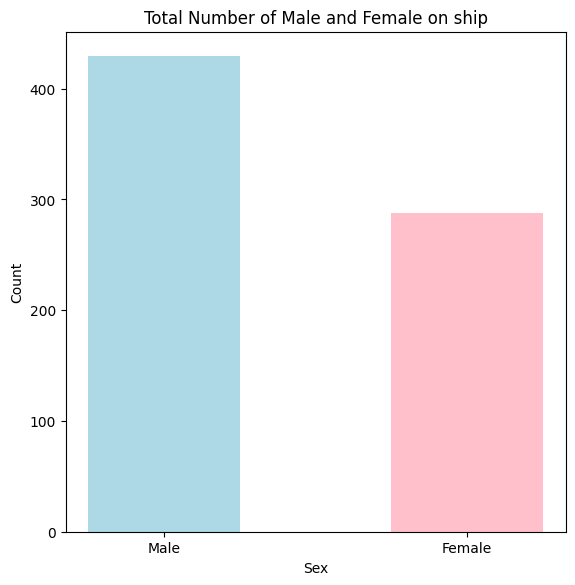

In [113]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0,0,1,1])
sex = ['Male','Female']
index = [430,288]
ax.bar(sex,index,color=["lightblue","pink"], width=0.5,align='center')
plt.title("Total Number of Male and Female on ship")
plt.ylabel("Count")
plt.xlabel('Sex')
plt.show()

#### Plotting the total number <b>(COUNT)</b> of people survived vs dead using bar graph.

In [88]:
survived=len(df[df['Survived']==1])
dead=len(df[df['Survived']==0])

In [89]:
print("Survived: ",survived)
print("Dead: ",dead)

Survived:  342
Dead:  549


In [90]:
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


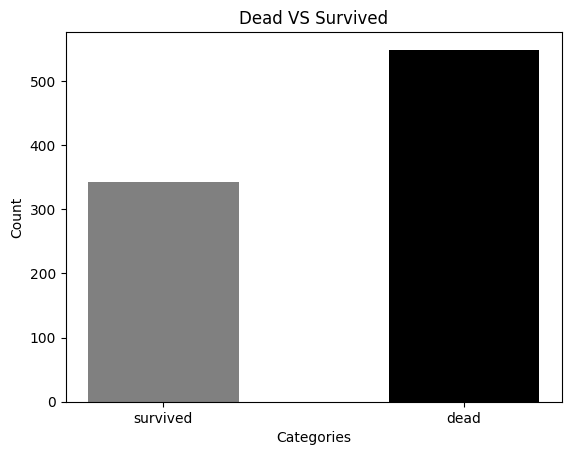

In [91]:
categories=["survived","dead"]
counts = [342,549]
plt.bar(categories,counts,color=['grey','black'], width=0.5,align='center')
plt.title("Dead VS Survived")
plt.xlabel("Categories")
plt.ylabel('Count')
plt.show()

#### Plotting the <b>"AGE"</b> distribution of passengers using histplot.

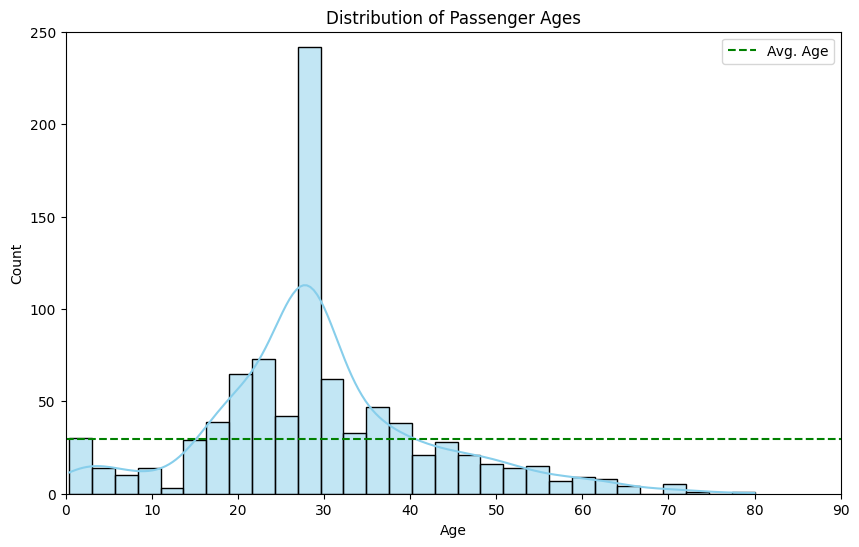

In [99]:
plt.figure(figsize=(10, 6))
sns.histplot(df.Age, kde=True, color='skyblue', bins=30)
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.axhline(df.Age.mean(), linestyle = '--', color = 'green', label = 'Avg. Age')
plt.legend()
plt.xlim(0, 90)
plt.ylim(0, 250)
plt.show()

#### Plotting <b>survived and death</b> of individuals w.r.t <b> "AGE"</b> using histogram.

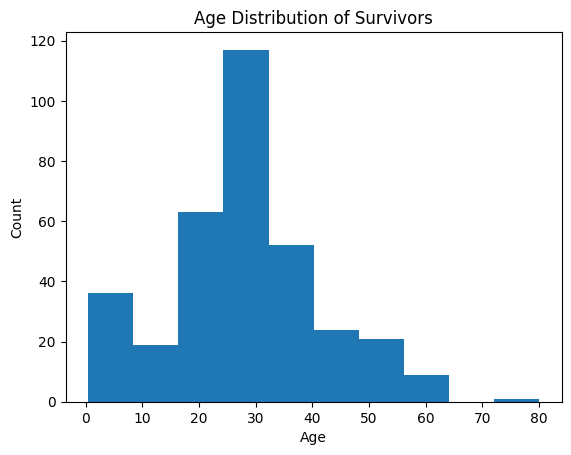

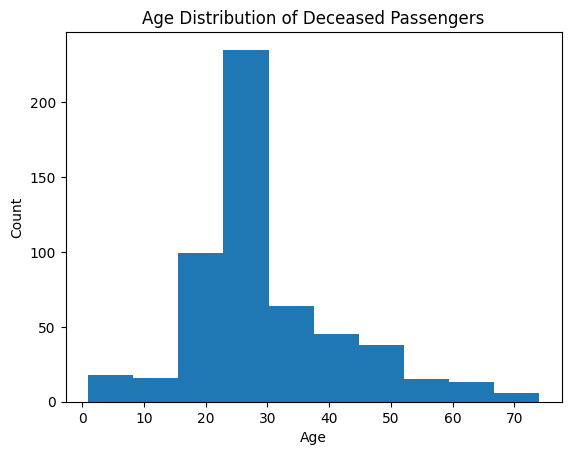

In [100]:
plt.figure()
age_survived = df.loc[df['Survived'] == 1, 'Age']
plt.title('Age Distribution of Survivors')
plt.xlabel("Age")
plt.ylabel("Count")
plt.hist(age_survived)
plt.show()

plt.figure()
age_died = df.loc[df['Survived'] == 0, 'Age']
plt.title('Age Distribution of Deceased Passengers')
plt.xlabel("Age")
plt.ylabel("Count")
plt.hist(age_died)
plt.show()

#### Plotting  <b>ticket class</b> wise distribution using histogram.

In [102]:
class_counts = df['Pclass'].value_counts()
print("Length of each class in Pclass:")
print(class_counts)

Length of each class in Pclass:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


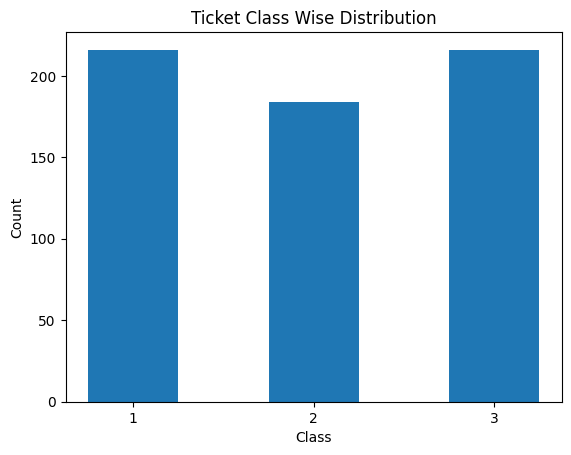

In [133]:
classes = ["1", "2", "3"]
counts = [216, 184, 216]

plt.bar(classes, counts, width=0.5, align='center') 
plt.title("Ticket Class Wise Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

#### Plotting suvived and death of individual w.r.t <b>Class</b> using bargraph.

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

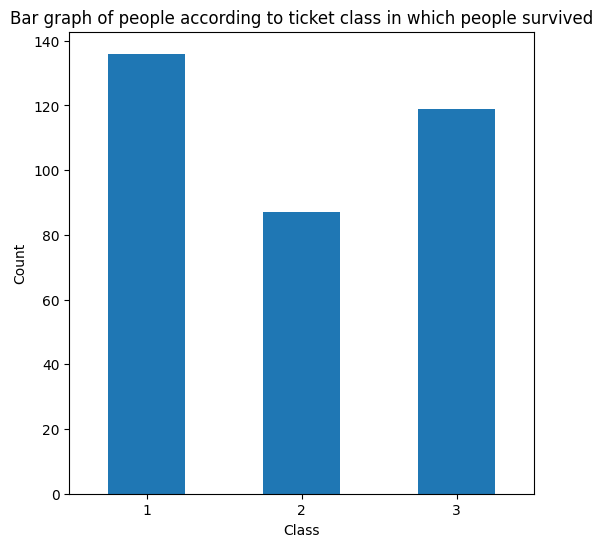

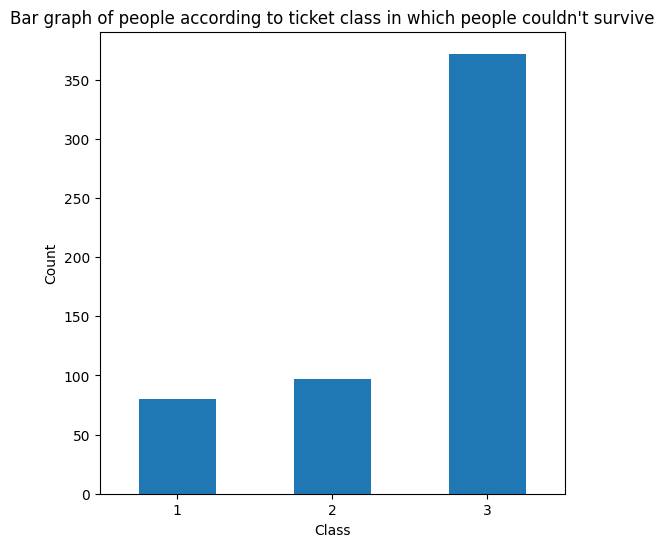

In [110]:
plt.figure(figsize=(6, 6))
df.loc[df['Survived']==1,'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people according to ticket class in which people survived')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.figure(figsize=(6, 6))
df.loc[df['Survived']==0,'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people according to ticket class in which people couldn\'t survive')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)

#### Plotting Survival of  Passenger Class wrt <b>Gender</B> using barplot

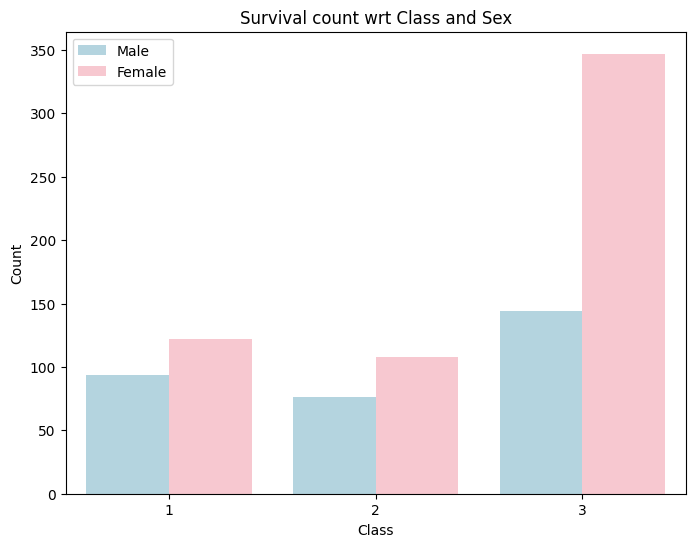

In [118]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass', hue='Sex', palette = ["lightblue","pink"])
plt.title('Survival count wrt Class and Sex')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(['Male', 'Female'])
plt.show()

#### Plotting count of passengers by <b>embarked port</b>

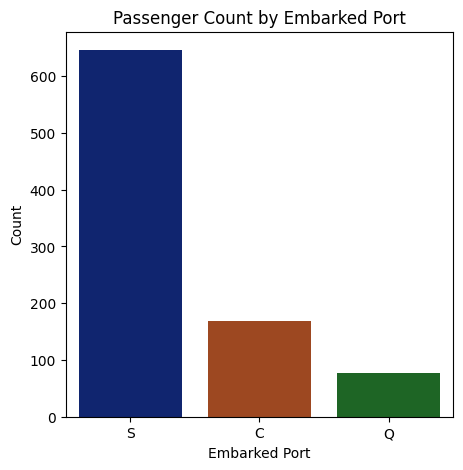

In [124]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Embarked', data=df, palette='dark')
plt.title('Passenger Count by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.show()

#### plotting survival of passenger with respect to <b>Embarked port</b>

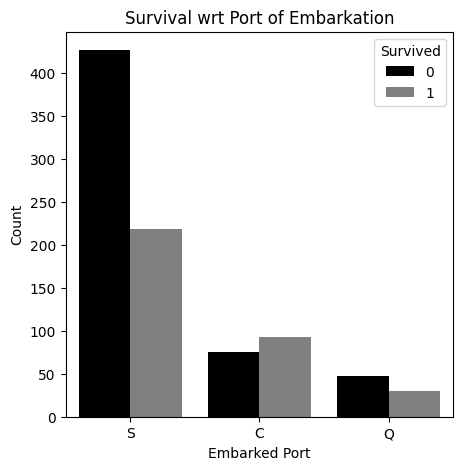

In [131]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='Embarked', hue='Survived', palette=['black', 'grey'])
plt.title('Survival wrt Port of Embarkation')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.show()

-----------